In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchlensmaker as tlm

rays aperture 0.0
rays aperture 1.7949524
rays aperture 1.7892609
rays aperture 1.723053
rays aperture 1.7034607


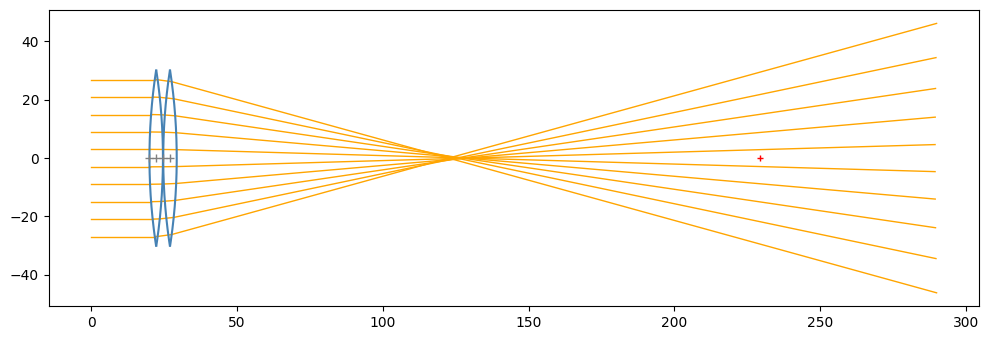

[  0/150] L= 313.738 | grad norm= 255673.4375


[  8/150] L= 18.956 | grad norm= 47209.796875


[ 16/150] L= 30.683 | grad norm= 77421.3046875


[ 24/150] L= 13.991 | grad norm= 49921.67578125


[ 32/150] L=  3.237 | grad norm= 24917.32421875


[ 40/150] L=  0.411 | grad norm= 8761.134765625


[ 48/150] L=  0.021 | grad norm= 1566.204345703125


[ 56/150] L=  0.009 | grad norm= 514.738037109375


[ 64/150] L=  0.010 | grad norm= 627.5234985351562


[ 72/150] L=  0.008 | grad norm= 83.97087097167969


[ 80/150] L=  0.009 | grad norm= 467.0164489746094


[ 88/150] L=  0.011 | grad norm= 835.796142578125


[ 96/150] L=  0.013 | grad norm= 961.4751586914062


[104/150] L=  0.012 | grad norm= 873.0753173828125


[112/150] L=  0.010 | grad norm= 638.0469970703125


[120/150] L=  0.008 | grad norm= 348.3313903808594


[128/150] L=  0.008 | grad norm= 94.36608123779297


[136/150] L=  0.008 | grad norm= 62.64331817626953


[144/150] L=  0.008 | grad norm= 109.4330825805664


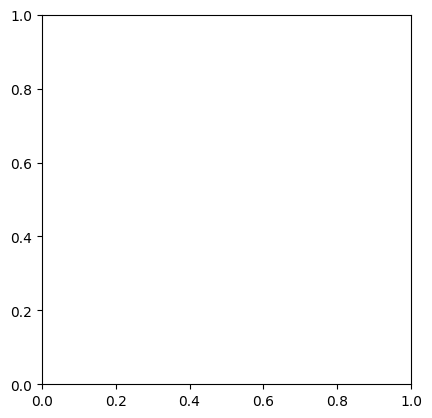

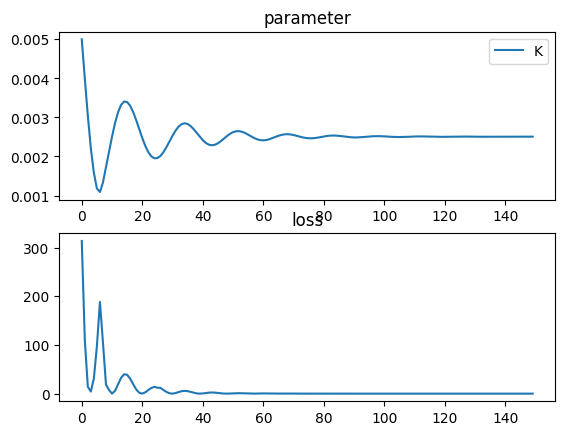

rays aperture 0.0
rays aperture 0.89712524
rays aperture 0.8963928
rays aperture 0.8878174
rays aperture 0.885437


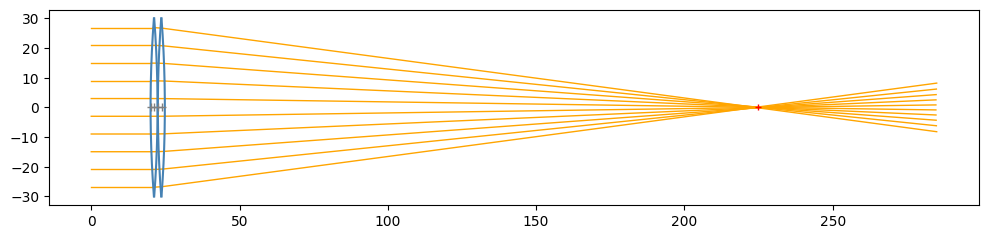

In [2]:

# Demo using surface anchors for surfaces

lens_radius = 60. # lens radius in mm
shape = tlm.CircularArc(lens_radius, nn.Parameter(torch.tensor(200.)))

optics = tlm.OpticalSequence(
    tlm.PointSourceAtInfinity(beam_diameter=0.9*lens_radius),
    tlm.Gap(20.),
    
    tlm.RefractiveSurface(shape, (1.0, 1.49), anchors=("origin", "extent")),
    tlm.Gap(0.1),
    tlm.RefractiveSurface(shape, (1.49, 1.0), scale=-1, anchors=("extent", "origin")),

    tlm.Gap(0.1),
    
    tlm.RefractiveSurface(shape, (1.0, 1.49), anchors=("origin", "extent")),
    tlm.Gap(0.1),
    tlm.RefractiveSurface(shape, (1.49, 1.0), scale=-1, anchors=("extent", "origin")),
    
    tlm.Gap(200.0), # focal length
    tlm.FocalPoint(),
)

tlm.render_plt(optics)

# Manually register parameters because we're not using tlm.Module
for n, p in shape.parameters().items():
    optics.register_parameter(n, p)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 150
)

tlm.render_plt(optics)